In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
import pandas
from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, mean_squared_error, roc_curve, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder


In [3]:
# DATA FORMAT FUNCTIONS
def onehot(x): return np.array(OneHotEncoder().fit_transform(x.values.reshape(-1,1)).todense())

#ONE HOT ENCODES A GIVEN COLUMN
def onehot2(x): return np.array(OneHotEncoder(n_values = 2).fit_transform(x.values.reshape(-1,1)).todense())

def format(data):
    del data['Unnamed: 605']
    mask = data['AgeGroup'] == 'ag1'
    column_name = 'AgeGroup'
    data.loc[mask, column_name] = 0
    mask = data['AgeGroup'] == 'ag2'
    column_name = 'AgeGroup'
    data.loc[mask, column_name] = 1
    mask = data['AgeGroup'] == 'ag3'
    column_name = 'AgeGroup'
    data.loc[mask, column_name] = 2
    mask = data['Gender'] == 'm'
    column_name = 'Gender'
    data.loc[mask, column_name] = 0
    mask = data['Gender'] == 'f'
    column_name = 'Gender'
    data.loc[mask, column_name] = 1
    return data

def formatAgePredictions(data):
    predictions = []
    for i in range(0, len(data)):
        if (np.round(data[i]) < 13):
            predictions.append(0)
        elif (np.round(data[i]) < 15):
            predictions.append(1)
        else:
            predictions.append(2)
    return predictions

def formatGenderPredictions(data):
    predictions = []
    for i in range(0, len(data)):
        predictions.append(np.argmax(data[i]))
    return predictions

def formatAgeGroupPredictions(data):
    predictions = []
    for i in range(0, len(data)):
        predictions.append(np.argmax(data[i]))
    return predictions

def indices(val, data, field):
    return_data = []
    for i in range(0, len(data)):
        if (data.iloc[i][field] == val):
            return_data.append(i)
    return return_data

def class_accuracy(y_pred, y_true, classs):
    index = indices(y_true, classs)
    y_pred, y_true = ypred[index], y_true[index]
    tp = [1 for k in range(len(y_pred)) if y_true[k]==y_pred[k]]
    tp = np.sum(tp)
    return tp/float(len(y_pred))

def getAgeGroupModelAccuracy(predictions, data):
    correct_predictions = []
    for i in range(0, len(predictions)):
        if (np.argmax(predictions[i]) == np.argmax(data[i])):
            correct_predictions.append(1)
        else:
            correct_predictions.append(0)
    return correct_predictions.count(1)/len(predictions)

def getGenderModelAccuracy(predictions, real):
    correct_predictions = []
    for i in range(0, len(predictions)):
        if (predictions[i] == real[i]):
            correct_predictions.append(1)
        else:
            correct_predictions.append(0)
    return correct_predictions.count(1)/len(predictions)

def formatAgeDataToAgeGroups(data):
    predictions = []
    for i in range(0, len(data)):
        if (np.round(data[i]) < 13):
            predictions.append([1, 0, 0])
        elif (np.round(data[i]) < 15):
            predictions.append([0, 1, 0])
        else:
            predictions.append([0, 0, 1])
    return predictions


In [4]:
# LOAD IN DATA LABELS
test_data_i_vectors = pandas.read_csv("/storage/tanel/child_age_gender/exp/ivectors_2048/test/export.csv", sep=" ")
test_data_i_vectors = format(test_data_i_vectors)
test_labels_age_group = test_data_i_vectors.AgeGroup.values
testFemaleIndexes = test_data_i_vectors.index[test_data_i_vectors['Gender'] == 1].tolist()
test_labels_age_group_females = test_labels_age_group[testFemaleIndexes]

val_data_i_vectors = pandas.read_csv("/storage/tanel/child_age_gender/exp/ivectors_2048/dev/export.csv", sep=" ")
val_data_i_vectors = format(val_data_i_vectors)
val_labels_age_group = val_data_i_vectors.AgeGroup.values
valFemaleIndexes = val_data_i_vectors.index[val_data_i_vectors['Gender'] == 1].tolist()
val_labels_age_group_females = val_labels_age_group[valFemaleIndexes]



test_labels_gender = test_data_i_vectors.Gender.values
age_10_indices = indices(10, test_data_i_vectors, 'Age')
age_11_indices = indices(11, test_data_i_vectors, 'Age')
age_12_indices = indices(12, test_data_i_vectors, 'Age')
age_13_indices = indices(13, test_data_i_vectors, 'Age')
age_14_indices = indices(14, test_data_i_vectors, 'Age')
age_15_indices = indices(15, test_data_i_vectors, 'Age')
age_16_indices = indices(16, test_data_i_vectors, 'Age')
age_17_indices = indices(17, test_data_i_vectors, 'Age')
age_18_indices = indices(18, test_data_i_vectors, 'Age')


survey_results = pandas.read_csv("./predictions/survey.csv", sep=";")
survey_results = survey_results.rename(columns={'\ufeffpredictedAge': 'predictedAge'})

mask = survey_results['predictedGender'] == 'Male'
column_name = 'predictedGender'
survey_results.loc[mask, column_name] = 0

mask = survey_results['predictedGender'] == 'Female'
column_name = 'predictedGender'
survey_results.loc[mask, column_name] = 1


mask = survey_results['realGender'] == 'Male'
column_name = 'realGender'
survey_results.loc[mask, column_name] = 0

mask = survey_results['realGender'] == 'Female'
column_name = 'realGender'
survey_results.loc[mask, column_name] = 1

test_data_i_vectors = pandas.read_csv("/storage/tanel/child_age_gender/exp/ivectors_2048/test/export.csv", sep=" ")
test_data_i_vectors = format(test_data_i_vectors)
test_labels_age_group = onehot(test_data_i_vectors['AgeGroup'])
test_labels_age_group_males = onehot(test_data_i_vectors['AgeGroup'][test_data_i_vectors['Gender'] == 0])
test_labels_age_group_females = onehot(test_data_i_vectors['AgeGroup'][test_data_i_vectors['Gender'] == 1])

test_data_indexes_used_in_survey = []
test_data_males_indexes_used_in_survey = []
test_data_females_indexes_used_in_survey = []





for i in range(0, len(test_data_i_vectors)):
    not_in_excluded = []
    for j in range(1, 10):
        if ('_' + str(j) + '_' not in test_data_i_vectors.iloc[i]['Utterance']):
            not_in_excluded.append(j)
    if (len(not_in_excluded) == 9):
        test_data_indexes_used_in_survey.append(i)
        if(test_data_i_vectors.iloc[i]['Gender'] == 0):
            test_data_males_indexes_used_in_survey.append(i)
        else:
            test_data_females_indexes_used_in_survey.append(i)
print (len(test_data_indexes_used_in_survey))


test_data_i_vectors_used_in_survey = test_data_i_vectors.iloc[test_data_indexes_used_in_survey]
test_labels_gender = onehot(test_data_i_vectors['Gender'])
test_labels_age_group_used_in_survey_males = onehot(test_data_i_vectors_used_in_survey['AgeGroup'][test_data_i_vectors_used_in_survey['Gender'] == 0])
test_labels_age_group_used_in_survey_females = onehot(test_data_i_vectors_used_in_survey['AgeGroup'][test_data_i_vectors_used_in_survey['Gender'] == 1])
test_labels_age_group_used_in_survey = test_labels_age_group[test_data_indexes_used_in_survey]
test_labels_gender_used_in_survey = test_labels_gender[test_data_indexes_used_in_survey]

1830


In [11]:
# CODE FROM http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
def create_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '{:.2%}' if normalize else '{:d}'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, fmt.format(cm[i, j]),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [5]:
history_dnn_2 = np.load('./history/dnn/dnn_2.npy').item()
history_dnn_3 = np.load('./history/dnn/dnn_3.npy').item()
history_dnn_7 = np.load('./history/dnn/dnn_7.npy').item()
history_rnn_77 =np.load('./history/history_model_77.npy').item()
history_rnn_65 =np.load('./history/history_model_65.npy').item()
history_rnn_63 =np.load('./history/age/history_model_63.npy').item()
history_rnn_90 =np.load('./history/age/history_model_90.npy').item()
history_rnn_31 =np.load('./history/history_model_31.npy').item()
history_rnn_31 =np.load('./history/history_model_4.npy').item()
history_rnn_94 =np.load('./history/history_model_94.npy').item()
history_rnn_43_males =np.load('./history/history_model_43_males.npy').item()
history_dnn_2_males =np.load('./history/dnn/dnn_2_males.npy').item()



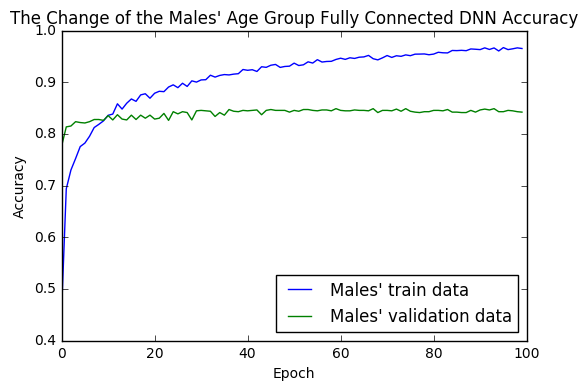

In [6]:
plt.plot(history_dnn_2_males['age_group_accuracy'])
plt.plot(history_dnn_2_males['val_age_group_accuracy'])
plt.title("The Change of the Males' Age Group Fully Connected DNN Accuracy")
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.ylim(ymax=1.00)

plt.xlim(xmax=100)
plt.legend(["Males' train data", "Males' validation data"], loc='lower right')
plt.show()



In [148]:
plt.plot(history_dnn_3['loss'])
plt.plot(history_dnn_3['val_loss'])
plt.title('The change of the value of age group model loss function')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train data', 'validation data'], loc='upper right')
plt.show()

KeyError: (500.0, 0.0, '500', 'k', 'top', 'center', 8844460620164242963, 90, None, 100.0, 139862401125568)

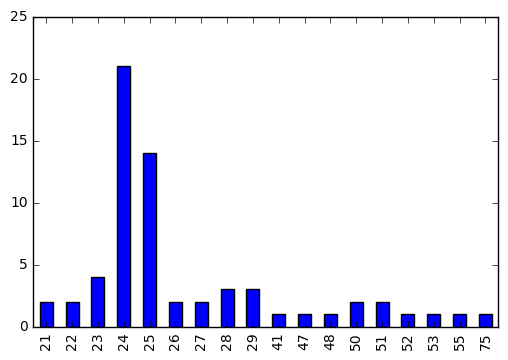

In [20]:
grouped = survey_results.groupby('age')['age'].transform('count')
survey_results['freq'] = grouped
df = survey_results.drop_duplicates('age')
(survey_results['age'].value_counts(sort=False, dropna=False)/10).plot(kind='bar')
plt.show()

Confusion matrix, without normalization
[[291   6]
 [ 86 257]]
Normalized confusion matrix
[[ 0.98  0.02]
 [ 0.25  0.75]]


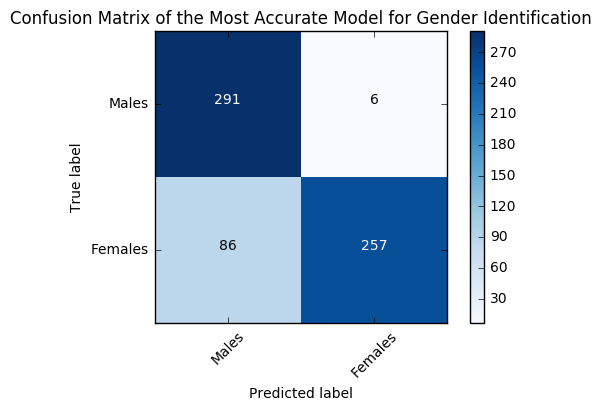

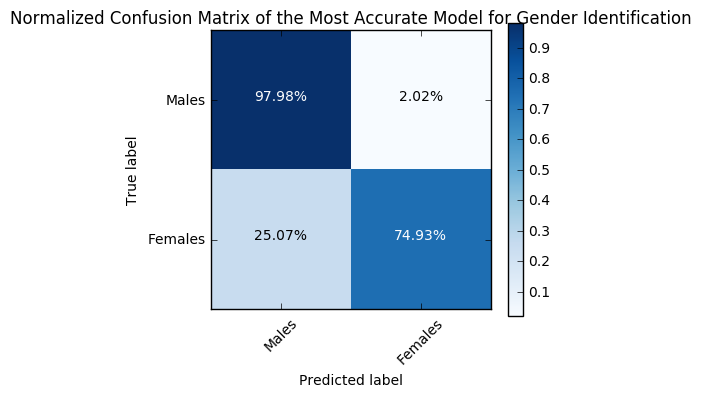

In [42]:
gender_model_test = formatGenderPredictions(np.load("./predictions/test/dnn_3_gender.npy", encoding="bytes")[test_data_indexes_used_in_survey])
# Compute confusion matrix
cnf_matrix = confusion_matrix(survey_results['realGender'].tolist(), survey_results['predictedGender'].tolist())
np.set_printoptions(precision=2)
class_names = ['Males', 'Females']
# Plot non-normalized confusion matrix
plt.figure()
create_confusion_matrix(cnf_matrix, classes=class_names, title="Confusion Matrix of the Most Accurate Model for Gender Identification")

# Plot normalized confusion matrix
plt.figure()
create_confusion_matrix(cnf_matrix, classes=class_names, normalize=True, title="Normalized Confusion Matrix of the Most Accurate Model for Gender Identification")

plt.show()



In [43]:
print (classification_report(survey_results['realGender'].tolist(),
                             survey_results['predictedGender'].tolist(),
                             target_names=["Males", "Females"],
                            digits=4))

             precision    recall  f1-score   support

      Males     0.7719    0.9798    0.8635       297
    Females     0.9772    0.7493    0.8482       343

avg / total     0.8819    0.8562    0.8553       640



In [52]:
print (classification_report(formatGenderPredictions(test_labels_gender_used_in_survey),
                             gender_model_test,
                             target_names=["Male", "Female"],
                            digits=4))

[[ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 ..., 
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]]
             precision    recall  f1-score   support

       Male     0.8876    0.9614    0.9230       854
     Female     0.9635    0.8934    0.9272       976

avg / total     0.9281    0.9251    0.9252      1830



In [25]:
print (classification_report(test_labels_age_group.tolist(),
                             multi_input_model_63,
                             target_names=["AG1", "AG2", "AG3"],
                            digits=4))

             precision    recall  f1-score   support

        AG1     0.7597    0.8018    0.7802       560
        AG2     0.6982    0.5468    0.6133       770
        AG3     0.7439    0.8753    0.8043       770

avg / total     0.7314    0.7352    0.7278      2100



In [43]:
print (classification_report(test_labels_age_group.tolist(),
                             combined_model_test_predictions,
                             target_names=["AG 1", "AG 2", "AG 3"],
                            digits=4))

             precision    recall  f1-score   support

       AG 1     0.7465    0.8518    0.7957       560
       AG 2     0.7814    0.5013    0.6108       770
       AG 3     0.7642    0.9597    0.8509       770

avg / total     0.7658    0.7629    0.7481      2100



In [39]:
print (classification_report(test_labels_age_group.tolist(),
                             rnn_multi_output,
                             target_names=["AG 1", "AG 2", "AG 3"],
                            digits=4))

             precision    recall  f1-score   support

       AG 1     0.7128    0.7536    0.7326       560
       AG 2     0.7317    0.4532    0.5597       770
       AG 3     0.7148    0.9571    0.8184       770

avg / total     0.7205    0.7181    0.7007      2100



In [28]:
print (classification_report(test_labels_age_group.tolist(),
                             rnn,
                             target_names=["AG 1", "AG 2", "AG 3"],
                            digits=4))

NameError: name 'rnn' is not defined

In [5]:
test_labels_age = test_data_i_vectors['Age']

dnn_7_predictions = np.load("./predictions/test/dnn_7_age_group.npy", encoding="bytes")[test_data_indexes_used_in_survey]
print (mean_absolute_error(dnn_7_predictions, test_labels_age[test_data_indexes_used_in_survey]))


0.935027456023


In [12]:
dnn_7_test_predictions = formatGenderPredictions(np.load("./predictions/test/rnn_7_gender.npy", encoding="bytes"))

# Compute confusion matrix
cnf_matrix = confusion_matrix(test_labels_gender.tolist(), dnn_7_test_predictions)
np.set_printoptions(precision=2)
class_names = ['Males', 'Females']
# Plot non-normalized confusion matrix
plt.figure()
create_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion Matrix of the Gender Output of the Multi-Output DNN')

# Plot normalized confusion matrix
plt.figure()
create_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized Confusion Matrix of the Gender Output of the Multi-Output DNN')

plt.show()



FileNotFoundError: [Errno 2] No such file or directory: './predictions/test/rnn_7_gender.npy'

[1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1]


In [46]:
# DNN_3 GENDER ACCURACY FOR EACH AGE SEPARATELY
print ("10: ", str(accuracy_score(np.array(test_labels_gender_10).tolist(), np.array(np.array(gender_94_test_predictions)[age_10_indices]).tolist())))
print ("11: ", str(accuracy_score(np.array(test_labels_gender_11).tolist(), np.array(np.array(gender_94_test_predictions)[age_11_indices]).tolist())))
print ("12: ", str(accuracy_score(np.array(test_labels_gender_12).tolist(), np.array(np.array(gender_94_test_predictions)[age_12_indices]).tolist())))
print ("13: ", str(accuracy_score(np.array(test_labels_gender_13).tolist(), np.array(np.array(gender_94_test_predictions)[age_13_indices]).tolist())))
print ("14: ", str(accuracy_score(np.array(test_labels_gender_14).tolist(), np.array(np.array(gender_94_test_predictions)[age_14_indices]).tolist())))
print ("15: ", str(accuracy_score(np.array(test_labels_gender_15).tolist(), np.array(np.array(gender_94_test_predictions)[age_15_indices]).tolist())))
print ("16: ", str(accuracy_score(np.array(test_labels_gender_16).tolist(), np.array(np.array(gender_94_test_predictions)[age_16_indices]).tolist())))
print ("17: ", str(accuracy_score(np.array(test_labels_gender_17).tolist(), np.array(np.array(gender_94_test_predictions)[age_17_indices]).tolist())))
print ("18: ", str(accuracy_score(np.array(test_labels_gender_18).tolist(), np.array(np.array(gender_94_test_predictions)[age_18_indices]).tolist())))


10:  0.696428571429
11:  0.647619047619
12:  0.457142857143
13:  0.796428571429
14:  0.881632653061
15:  0.964285714286
16:  0.918367346939
17:  0.971428571429
18:  0.957142857143


In [143]:
test_labels_gender_10[150:180]

150    0
151    0
152    0
153    0
154    0
155    0
156    0
157    0
158    0
159    0
160    0
161    0
162    0
163    0
164    0
165    0
166    0
167    0
168    0
169    0
170    0
171    0
172    0
173    0
174    0
175    0
176    0
177    0
178    0
179    0
Name: Gender, dtype: object

In [18]:
for i in range(10, 19):
    exec("test_data_gender_%d = test_data_i_vectors[test_data_i_vectors['Age'] == %d]" % (i, i))
    exec("test_labels_gender_%d = test_data_gender_%d['Gender']" % (i, i))
    exec("test_i_vectors_gender_%d =  test_data_gender_%d.iloc[:, 5:].as_matrix()" % (i,i))

    exec("test_data_gender_%d_boys = test_data_i_vectors[test_data_i_vectors['Age'] == %d]" % (i, i))
    exec("test_labels_gender_%d_boys = onehot2(test_data_gender_%d_boys['Gender'])" % (i, i))
    exec("test_i_vectors_gender_%d_boys =  test_data_gender_%d_boys.iloc[:, 5:].as_matrix()" % (i, i))

    
    exec("test_data_gender_%d_girls = test_data_i_vectors[test_data_i_vectors['Age'] == %d]" % (i, i))
    exec("test_labels_gender_%d_girls = onehot2(test_data_gender_%d_girls['Gender'])" % (i, i))
    exec("test_i_vectors_gender_%d_girls =  test_data_gender_%d_girls.iloc[:, 5:].as_matrix()" % (i, i))


In [54]:
combined_model_test_predictions = np.load("./predictions/test/combined_prediction_2.npy", encoding="bytes")
print (formatAgeGroupPredictions(combined_model_test_predictions))
fpr, tpr, threshold = roc_curve(formatAgeGroupPredictions(test_labels_age_group), formatAgeGroupPredictions(combined_model_test_predictions))


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 2, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

ValueError: Data is not binary and pos_label is not specified